# GridPath Workshop (UCSB)

Initialization of functionalities

In [1]:
import os
import sys
import pandas as pd

# Print the current working directory. The result should end with state_model
software_dir = os.getcwd()
os.chdir("..")
print(software_dir)

/Users/Guille/Desktop/state_model/gridpath-workshop-ucsb


In [2]:
#Setting this as the primary directory for all future use
# This is be the main folder where all files are created and stored in. 
directory = os.getcwd()
print(directory)

/Users/Guille/Desktop/state_model


In [3]:
# Defining the database directory - where the database file will be created and stored. 
db_dir = f"{directory}/db"

# Defining CSV inputs directory - where the state level input files are stored. 
csv_dir = f"{directory}/input_csvs_gridpath"

#Defining scenario folder location
scen_dir = f"{directory}/scenarios"

# GridPath
The following section is for running GridPath.

## User edit section
Add the folder name with input csvs and provide a name for this database.

In [4]:
# Speciific  model for this run.
# Add the name of the specific mode folder file by replacing the worth between " " 
input_csvs_gridpath = "TN_7-2050-24"

# Add your database name below between "" or leave blank to use input_csvs_gridpath as database name
db_name = ""
db_name = db_name if db_name else input_csvs_gridpath
print(f"Database name is set to: {db_name}")

Database name is set to: TN_7-2050-24


## Creating database, importing state inputs and importing scenarios to the database for modelling

In [5]:
!python {directory}/gridpath/db/create_database.py --database {db_dir}/{db_name}.db
!python {directory}/gridpath/db/utilities/port_csvs_to_db.py --database {db_dir}/{db_name}.db --csv_location {csv_dir}/{input_csvs_gridpath}
!python {directory}/gridpath/db/utilities/scenario.py --database {db_dir}/{db_name}.db --csv_path {csv_dir}/{input_csvs_gridpath}/scenarios.csv

Importing data for subscenario solver_options_id, table options_solver from /Users/Guille/Desktop/state_model/input_csvs_gridpath/TN_7-2050-24/solver...
...importing CSV 4_gurobi_4th_high_mipgap.csv
   ...importing data from 4_gurobi_4th_high_mipgap.csv
...importing CSV 3_cbc.csv
   ...importing data from 3_cbc.csv
...importing CSV 2_cbc.csv
   ...importing data from 2_cbc.csv
Importing data for subscenario temporal_scenario_id, table temporal from /Users/Guille/Desktop/state_model/input_csvs_gridpath/TN_7-2050-24/temporal...
...importing data from directory /Users/Guille/Desktop/state_model/input_csvs_gridpath/TN_7-2050-24/temporal/1_7periods_2020-2050
   ...importing data from nan
...importing data from directory /Users/Guille/Desktop/state_model/input_csvs_gridpath/TN_7-2050-24/temporal/2_5periods_2020-2040
   ...importing data from nan
...importing data from directory /Users/Guille/Desktop/state_model/input_csvs_gridpath/TN_7-2050-24/temporal/3_3periods_2020-2030
   ...importing da

In [6]:
# This will print out all possible scenarios available
scenario_csv = pd.read_csv(f"{csv_dir}/{input_csvs_gridpath}/scenarios.csv")
column_names = scenario_csv.columns[1:]

# Print scenario names
print("Available scenarios:")
for name in column_names:
    print(name)

Available scenarios:
VRElow_STlow_CONVmid_BPHS_NuclearPVboth_45Ret_PRM110_TN_3_2030_24
VREmid_STmid_CONVmid_BPHS_NuclearPVboth_45Ret_PRM110_TN_3_2030_24
VREhigh_SThigh_CONVmid_BPHS_NuclearPVboth_45Ret_PRM110_TN_3_2030_24
VRElow_STlow_CONVmid_BPHS_NuclearPVboth_45Ret_PRM110_TN_4_2035_24
VREmid_STmid_CONVmid_BPHS_NuclearPVboth_45Ret_PRM110_TN_4_2035_24
VREhigh_SThigh_CONVmid_BPHS_NuclearPVboth_45Ret_PRM110_TN_4_2035_24


## Select scenarios from the list above and add to the selected_scenario below before running.

In [7]:
# Select scenario #1 from above for run
selected_scenario = "VRElow_STlow_CONVmid_BPHS_NuclearPVboth_45Ret_PRM110_TN_3_2030_24"
!python {directory}/gridpath/gridpath/run_end_to_end.py --database {db_dir}/{db_name}.db --scenario {selected_scenario} --scenario_location {scen_dir}

Running scenario VRElow_STlow_CONVmid_BPHS_NuclearPVboth_45Ret_PRM110_TN_3_2030_24 end to end
Process ID is 35672
End-to-end run started on 2024-09-25 21:29:46.327199
Getting inputs... (connected to database /Users/Guille/Desktop/state_model/db/TN_7-2050-24.db)

Running optimization for scenario VRElow_STlow_CONVmid_BPHS_NuclearPVboth_45Ret_PRM110_TN_3_2030_24
Building model...
Loading data...
Creating problem instance...
Solving...
Welcome to the CBC MILP Solver 
Version: 2.10.12 
Build Date: Sep  3 2024 

command line - /Users/Guille/opt/anaconda3/envs/wri-india/bin/cbc -Threads 4.0 -printingOptions all -import /var/folders/0c/ffx2kgyn7xq4krqrpsv67l3m0000gn/T/tmpy7a_l9t7.pyomo.lp -stat=1 -solve -solu /var/folders/0c/ffx2kgyn7xq4krqrpsv67l3m0000gn/T/tmpy7a_l9t7.pyomo.soln (default strategy 1)
String of 4.0 is illegal for integer parameter threads value remains 0
Option for printingOptions changed from normal to all
 CoinLpIO::readLp(): Maximization problem reformulated as minimization

In [8]:
# Select scenario #2 from above for run
selected_scenario = "VREmid_STmid_CONVmid_BPHS_NuclearPVboth_45Ret_PRM110_TN_3_2030_24"
!python {directory}/gridpath/gridpath/run_end_to_end.py --database {db_dir}/{db_name}.db --scenario {selected_scenario} --scenario_location {scen_dir}

Running scenario VREmid_STmid_CONVmid_BPHS_NuclearPVboth_45Ret_PRM110_TN_3_2030_24 end to end
Process ID is 35723
End-to-end run started on 2024-09-25 21:33:31.439522
Getting inputs... (connected to database /Users/Guille/Desktop/state_model/db/TN_7-2050-24.db)

Running optimization for scenario VREmid_STmid_CONVmid_BPHS_NuclearPVboth_45Ret_PRM110_TN_3_2030_24
Building model...
Loading data...
Creating problem instance...
Solving...
Welcome to the CBC MILP Solver 
Version: 2.10.12 
Build Date: Sep  3 2024 

command line - /Users/Guille/opt/anaconda3/envs/wri-india/bin/cbc -Threads 4.0 -printingOptions all -import /var/folders/0c/ffx2kgyn7xq4krqrpsv67l3m0000gn/T/tmpsmcu1or1.pyomo.lp -stat=1 -solve -solu /var/folders/0c/ffx2kgyn7xq4krqrpsv67l3m0000gn/T/tmpsmcu1or1.pyomo.soln (default strategy 1)
String of 4.0 is illegal for integer parameter threads value remains 0
Option for printingOptions changed from normal to all
 CoinLpIO::readLp(): Maximization problem reformulated as minimization

In [9]:
# Select scenario #3 from above for run
selected_scenario = "VREhigh_SThigh_CONVmid_BPHS_NuclearPVboth_45Ret_PRM110_TN_3_2030_24"
!python {directory}/gridpath/gridpath/run_end_to_end.py --database {db_dir}/{db_name}.db --scenario {selected_scenario} --scenario_location {scen_dir}

Running scenario VREhigh_SThigh_CONVmid_BPHS_NuclearPVboth_45Ret_PRM110_TN_3_2030_24 end to end
Process ID is 35766
End-to-end run started on 2024-09-25 21:37:10.289528
Getting inputs... (connected to database /Users/Guille/Desktop/state_model/db/TN_7-2050-24.db)

Running optimization for scenario VREhigh_SThigh_CONVmid_BPHS_NuclearPVboth_45Ret_PRM110_TN_3_2030_24
Building model...
Loading data...
Creating problem instance...
Solving...
Welcome to the CBC MILP Solver 
Version: 2.10.12 
Build Date: Sep  3 2024 

command line - /Users/Guille/opt/anaconda3/envs/wri-india/bin/cbc -Threads 4.0 -printingOptions all -import /var/folders/0c/ffx2kgyn7xq4krqrpsv67l3m0000gn/T/tmpkshsp3to.pyomo.lp -stat=1 -solve -solu /var/folders/0c/ffx2kgyn7xq4krqrpsv67l3m0000gn/T/tmpkshsp3to.pyomo.soln (default strategy 1)
String of 4.0 is illegal for integer parameter threads value remains 0
Option for printingOptions changed from normal to all
 CoinLpIO::readLp(): Maximization problem reformulated as minimiza

# Vizualization
The following section is for visualizing the results from the GridPath model above.

In [4]:
# Checking the directory is correct - should be state_model folder
os.chdir(software_dir)
print(os.getcwd())

/Users/Guille/Desktop/state_model/gridpath-workshop-ucsb


In [5]:
# loading packages and setting results folder
from loading_utils import * 
from plotting_utils import * 

path_to_scenarios = f"{directory}/scenarios"
print(path_to_scenarios)

/Users/Guille/Desktop/state_model/scenarios


Loading necessary functions for the zones, scenarios labels `<scenario_labels.csv>` and technology colors `<technology_labels.csv>` to plot the graph for new and existing capacity

In [6]:
scen_labels_ = pd.read_csv(directory + '/input_csvs_plotting/scenario_labels.csv') 
tech_labels_ = pd.read_csv(directory + '/input_csvs_plotting/technology_labels.csv') 

Load new and existing capacity across different scenarios, grouping the capacity by technology.

In [7]:
capacity_         = _load_new_and_existing_capacity(scen_labels_, path_to_scenarios)
grouped_capacity_ = _group_capacity_technologies(capacity_, tech_labels_)
grouped_capacity_.style

VRElow_STlow_CONVmid_BPHS_NuclearPVboth_45Ret_PRM110_TN_3_2030_24
VREmid_STmid_CONVmid_BPHS_NuclearPVboth_45Ret_PRM110_TN_3_2030_24
VREhigh_SThigh_CONVmid_BPHS_NuclearPVboth_45Ret_PRM110_TN_3_2030_24


,Scenario,Period,Technology,Zone,Status,Power,Energy
0,VREhigh_SThigh_CONVmid_BPHS_NuclearPVboth_45Ret_PRM110_TN_3_2030_24,2020,Battery,Tamil_Nadu,new,0.000000,0.000000
1,VREhigh_SThigh_CONVmid_BPHS_NuclearPVboth_45Ret_PRM110_TN_3_2030_24,2020,Battery,Tamil_Nadu,existing,0.000000,0.000000
2,VREhigh_SThigh_CONVmid_BPHS_NuclearPVboth_45Ret_PRM110_TN_3_2030_24,2020,Coal,Tamil_Nadu,new,0.000000,0.000000
3,VREhigh_SThigh_CONVmid_BPHS_NuclearPVboth_45Ret_PRM110_TN_3_2030_24,2020,Coal,Tamil_Nadu,existing,13911.187000,0.000000
4,VREhigh_SThigh_CONVmid_BPHS_NuclearPVboth_45Ret_PRM110_TN_3_2030_24,2020,Curtailment,Tamil_Nadu,new,0.000000,0.000000
5,VREhigh_SThigh_CONVmid_BPHS_NuclearPVboth_45Ret_PRM110_TN_3_2030_24,2020,Curtailment,Tamil_Nadu,existing,0.000000,0.000000
6,VREhigh_SThigh_CONVmid_BPHS_NuclearPVboth_45Ret_PRM110_TN_3_2030_24,2020,Diesel,Tamil_Nadu,new,0.000000,0.000000
7,VREhigh_SThigh_CONVmid_BPHS_NuclearPVboth_45Ret_PRM110_TN_3_2030_24,2020,Diesel,Tamil_Nadu,existing,0.000000,0.000000
8,VREhigh_SThigh_CONVmid_BPHS_NuclearPVboth_45Ret_PRM110_TN_3_2030_24,2020,Export,Tamil_Nadu,new,0.000000,0.000000
9,VREhigh_SThigh_CONVmid_BPHS_NuclearPVboth_45Ret_PRM110_TN_3_2030_24,2020,Export,Tamil_Nadu,existing,0.000000,0.000000


Plotting the new and existing capacity across different scenarios. Add title name for the plot.

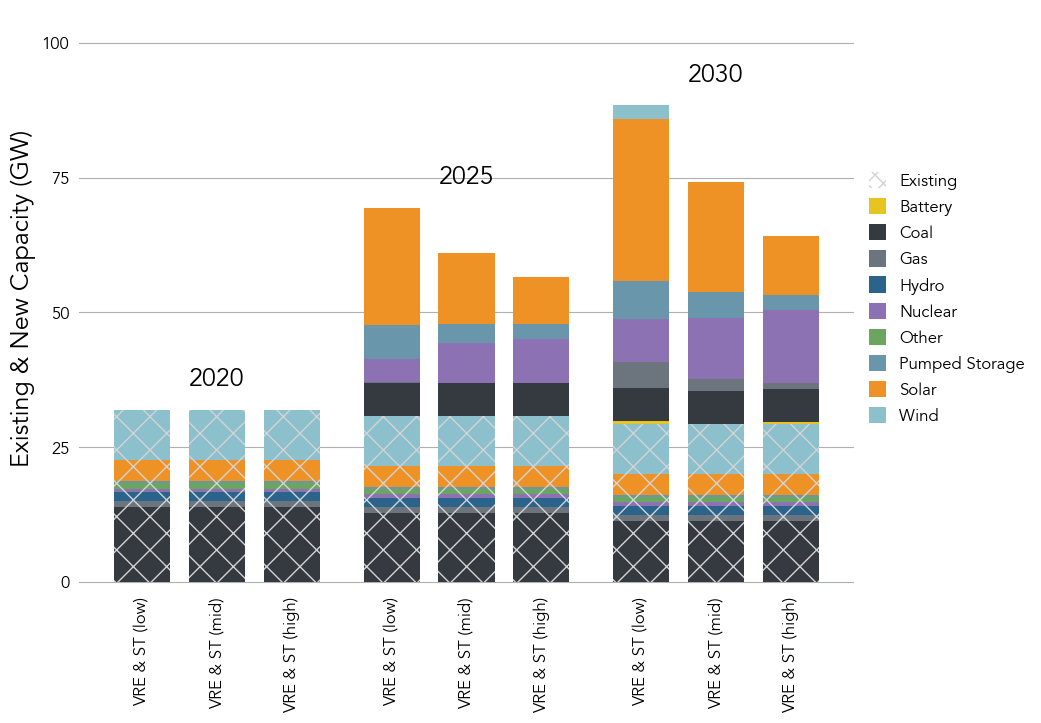

In [8]:
# Enter a title of your choice between the quotation marks ('') under title = ''.
_plot_new_and_existing_capacity(grouped_capacity_, scen_labels_, tech_labels_,
                                units        = 1e3,
                                units_label  = 'Existing & New Capacity (GW)',
                                legend       = True,
                                save         = True,
                                y_grid_inc   = 25,
                                title        = '',
                                file_name    = directory + r'/plots/group_installed_capacity.png')

Load energy dispatch across scenarios and group the energy dispatch by technology

In [9]:
dispatch_         = _load_energy_dispatch(scen_labels_, path_to_scenarios)
tx_losses_        = _load_energy_transmission(scen_labels_, path_to_scenarios)
dispatch_         = _merge_dispatch_and_tx_losses_(dispatch_, tx_losses_)
grouped_dispatch_ = _group_dispatch_technologies(dispatch_, tech_labels_)
grouped_dispatch_.style

VRElow_STlow_CONVmid_BPHS_NuclearPVboth_45Ret_PRM110_TN_3_2030_24
VREmid_STmid_CONVmid_BPHS_NuclearPVboth_45Ret_PRM110_TN_3_2030_24
VREhigh_SThigh_CONVmid_BPHS_NuclearPVboth_45Ret_PRM110_TN_3_2030_24
VRElow_STlow_CONVmid_BPHS_NuclearPVboth_45Ret_PRM110_TN_3_2030_24
VREmid_STmid_CONVmid_BPHS_NuclearPVboth_45Ret_PRM110_TN_3_2030_24
VREhigh_SThigh_CONVmid_BPHS_NuclearPVboth_45Ret_PRM110_TN_3_2030_24


,Scenario,Period,Technology,Zone,Energy
0,VREmid_STmid_CONVmid_BPHS_NuclearPVboth_45Ret_PRM110_TN_3_2030_24,2020,Coal,Tamil_Nadu,58425993.631182
1,VREmid_STmid_CONVmid_BPHS_NuclearPVboth_45Ret_PRM110_TN_3_2030_24,2020,Gas,Tamil_Nadu,2264931.227710
2,VREmid_STmid_CONVmid_BPHS_NuclearPVboth_45Ret_PRM110_TN_3_2030_24,2020,Diesel,Tamil_Nadu,0.000000
3,VREmid_STmid_CONVmid_BPHS_NuclearPVboth_45Ret_PRM110_TN_3_2030_24,2020,Hydro,Tamil_Nadu,5597077.006610
4,VREmid_STmid_CONVmid_BPHS_NuclearPVboth_45Ret_PRM110_TN_3_2030_24,2020,Pumped Storage,Tamil_Nadu,-55240.476620
5,VREmid_STmid_CONVmid_BPHS_NuclearPVboth_45Ret_PRM110_TN_3_2030_24,2020,Wind,Tamil_Nadu,6724410.700687
6,VREmid_STmid_CONVmid_BPHS_NuclearPVboth_45Ret_PRM110_TN_3_2030_24,2020,Solar,Tamil_Nadu,5824864.824750
7,VREmid_STmid_CONVmid_BPHS_NuclearPVboth_45Ret_PRM110_TN_3_2030_24,2020,Other,Tamil_Nadu,7989200.910000
8,VREmid_STmid_CONVmid_BPHS_NuclearPVboth_45Ret_PRM110_TN_3_2030_24,2020,Hydrogen,Tamil_Nadu,0.000000
9,VREmid_STmid_CONVmid_BPHS_NuclearPVboth_45Ret_PRM110_TN_3_2030_24,2020,Battery,Tamil_Nadu,0.000000


Plotting energy dispatch per technology for different scenarios

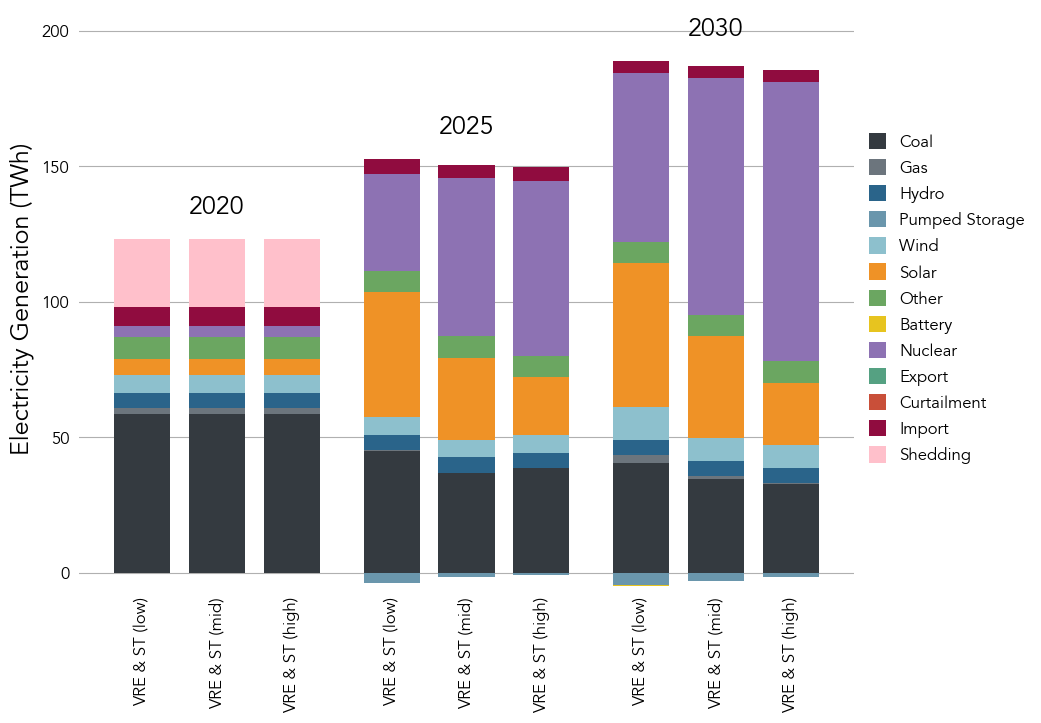

In [11]:
# Enter a title of your choice between the quotation marks ('') under title = ''.
_plot_dispatch(grouped_dispatch_, scen_labels_,  tech_labels_, 
               units        = 1e6, 
               units_label  = r'Electricity Generation (TWh)',
               save         = True,
               legend       = True,
               y_grid_inc   = 50,
               title        = '',
               file_name    = directory + r'/plots/group_electricity_generation.png')

Load Greenhouse Gas (GHG) emissions and load energy demand for different scenarios

In [19]:
emissions_, demand_ = _load_GHG_emissions(scen_labels_, path_to_scenarios)
emissions_.style

VRElow_STlow_CONVmid_BPHS_NuclearPVboth_45Ret_PRM110_TN_3_2030_24
VREmid_STmid_CONVmid_BPHS_NuclearPVboth_45Ret_PRM110_TN_3_2030_24
VREhigh_SThigh_CONVmid_BPHS_NuclearPVboth_45Ret_PRM110_TN_3_2030_24


,Scenario,Period,Technology,Zone,GHG
0,VRElow_STlow_CONVmid_BPHS_NuclearPVboth_45Ret_PRM110_TN_3_2030_24,2020,Biomass,Tamil_Nadu,0.000000
1,VRElow_STlow_CONVmid_BPHS_NuclearPVboth_45Ret_PRM110_TN_3_2030_24,2020,CCGT,Tamil_Nadu,948100.218926
2,VRElow_STlow_CONVmid_BPHS_NuclearPVboth_45Ret_PRM110_TN_3_2030_24,2020,CT,Tamil_Nadu,0.000000
3,VRElow_STlow_CONVmid_BPHS_NuclearPVboth_45Ret_PRM110_TN_3_2030_24,2020,Subcritical_Coal_Large,Tamil_Nadu,7580849.984064
4,VRElow_STlow_CONVmid_BPHS_NuclearPVboth_45Ret_PRM110_TN_3_2030_24,2020,Subcritical_Coal_Small,Tamil_Nadu,33155578.319837
5,VRElow_STlow_CONVmid_BPHS_NuclearPVboth_45Ret_PRM110_TN_3_2030_24,2020,Supercritical_Coal,Tamil_Nadu,16958893.335206
6,VRElow_STlow_CONVmid_BPHS_NuclearPVboth_45Ret_PRM110_TN_3_2030_24,2025,Biomass,Tamil_Nadu,0.000000
7,VRElow_STlow_CONVmid_BPHS_NuclearPVboth_45Ret_PRM110_TN_3_2030_24,2025,CCGT,Tamil_Nadu,92948.664286
8,VRElow_STlow_CONVmid_BPHS_NuclearPVboth_45Ret_PRM110_TN_3_2030_24,2025,CT,Tamil_Nadu,0.000000
9,VRElow_STlow_CONVmid_BPHS_NuclearPVboth_45Ret_PRM110_TN_3_2030_24,2025,Subcritical_Coal_Large,Tamil_Nadu,5673448.990558


Plot GHG emissions for different scenarios

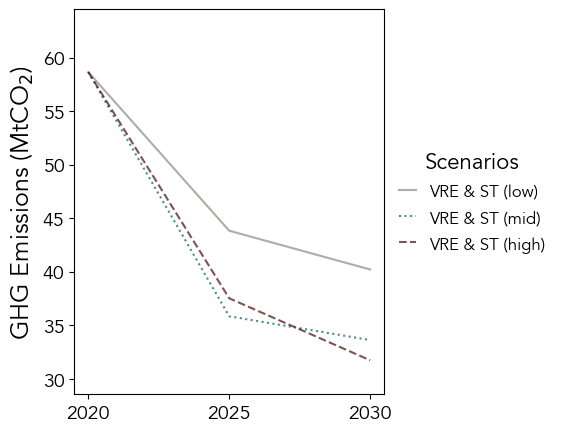

In [20]:
# Enter a title of your choice between the quotation marks ('') under title = ''.
_plot_emissions(emissions_, scen_labels_, 
                units      = 1e6,
                unit_label = r'GHG Emissions (MtCO$_2$)',
                save       = True,
                legend     = True,
                title      = '',
                file_name  = directory + r'/plots/GHG_emissions.png')

Processing GHG emissions intensity for different scenarios

In [21]:
intesity_, demand_ = _GHG_emissions_intensity(emissions_, demand_)
intesity_.style

VREhigh_SThigh_CONVmid_BPHS_NuclearPVboth_45Ret_PRM110_TN_3_2030_24
VRElow_STlow_CONVmid_BPHS_NuclearPVboth_45Ret_PRM110_TN_3_2030_24
VREmid_STmid_CONVmid_BPHS_NuclearPVboth_45Ret_PRM110_TN_3_2030_24


,Scenario,Zone,Period,GHG,Load,Intensity
0,VREhigh_SThigh_CONVmid_BPHS_NuclearPVboth_45Ret_PRM110_TN_3_2030_24,Tamil_Nadu,2020,58643421.858033,123091038.814881,0.476423
1,VREhigh_SThigh_CONVmid_BPHS_NuclearPVboth_45Ret_PRM110_TN_3_2030_24,Tamil_Nadu,2025,37521781.387382,148788203.794906,0.252183
2,VREhigh_SThigh_CONVmid_BPHS_NuclearPVboth_45Ret_PRM110_TN_3_2030_24,Tamil_Nadu,2030,31733532.705066,183972510.509319,0.172491
3,VRElow_STlow_CONVmid_BPHS_NuclearPVboth_45Ret_PRM110_TN_3_2030_24,Tamil_Nadu,2020,58643421.858033,123091038.814881,0.476423
4,VRElow_STlow_CONVmid_BPHS_NuclearPVboth_45Ret_PRM110_TN_3_2030_24,Tamil_Nadu,2025,43831755.586285,148788203.794906,0.294592
5,VRElow_STlow_CONVmid_BPHS_NuclearPVboth_45Ret_PRM110_TN_3_2030_24,Tamil_Nadu,2030,40212219.275034,183972510.509319,0.218577
6,VREmid_STmid_CONVmid_BPHS_NuclearPVboth_45Ret_PRM110_TN_3_2030_24,Tamil_Nadu,2020,58643421.858033,123091038.814881,0.476423
7,VREmid_STmid_CONVmid_BPHS_NuclearPVboth_45Ret_PRM110_TN_3_2030_24,Tamil_Nadu,2025,35841384.008124,148788203.794906,0.240889
8,VREmid_STmid_CONVmid_BPHS_NuclearPVboth_45Ret_PRM110_TN_3_2030_24,Tamil_Nadu,2030,33621493.349173,183972510.509319,0.182753


Plot GHG emissions intensity for different scenarios

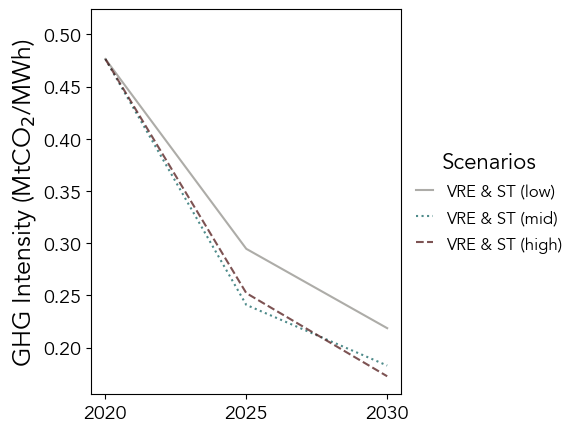

In [22]:
# Enter a title of your choice between the quotation marks ('') under title = ''.
_plot_emissions_intensity(intesity_, scen_labels_, 
                          unit_label = r'GHG Intensity (MtCO$_2$/MWh)',
                          save       = True,
                          legend     = True,
                          title      = '',
                          file_name  = directory + r'/plots/GHG_emissions_intensity.png')

Load system cost data for different scenarios

In [23]:
system_cost_ = _load_system_cost(scen_labels_, path_to_scenarios)
system_cost_.style

VRElow_STlow_CONVmid_BPHS_NuclearPVboth_45Ret_PRM110_TN_3_2030_24
VREmid_STmid_CONVmid_BPHS_NuclearPVboth_45Ret_PRM110_TN_3_2030_24
VREhigh_SThigh_CONVmid_BPHS_NuclearPVboth_45Ret_PRM110_TN_3_2030_24


,Scenario,Period,Zone,Variable_Costs,Fix_Costs,Load,Cost,LCOE
0,VRElow_STlow_CONVmid_BPHS_NuclearPVboth_45Ret_PRM110_TN_3_2030_24,2020,Tamil_Nadu,3411362264.667145,3184222192.264765,123091038.814881,6595584456.931910,53.582978
1,VRElow_STlow_CONVmid_BPHS_NuclearPVboth_45Ret_PRM110_TN_3_2030_24,2025,Tamil_Nadu,3684671489.2542977,6846517781.125552,148788203.794906,10531189270.379850,70.779733
2,VRElow_STlow_CONVmid_BPHS_NuclearPVboth_45Ret_PRM110_TN_3_2030_24,2030,Tamil_Nadu,4556670368.129175,8269714617.686215,183972510.509319,12826384985.815392,69.719030
3,VREmid_STmid_CONVmid_BPHS_NuclearPVboth_45Ret_PRM110_TN_3_2030_24,2020,Tamil_Nadu,3411362264.667145,3184222192.264765,123091038.814881,6595584456.931910,53.582978
4,VREmid_STmid_CONVmid_BPHS_NuclearPVboth_45Ret_PRM110_TN_3_2030_24,2025,Tamil_Nadu,3955761666.7386336,6848325794.59684,148788203.794906,10804087461.335474,72.613871
5,VREmid_STmid_CONVmid_BPHS_NuclearPVboth_45Ret_PRM110_TN_3_2030_24,2030,Tamil_Nadu,4845670919.954027,8097993571.704059,183972510.509319,12943664491.658085,70.356514
6,VREhigh_SThigh_CONVmid_BPHS_NuclearPVboth_45Ret_PRM110_TN_3_2030_24,2020,Tamil_Nadu,3411362264.667145,3184222192.264765,123091038.814881,6595584456.931910,53.582978
7,VREhigh_SThigh_CONVmid_BPHS_NuclearPVboth_45Ret_PRM110_TN_3_2030_24,2025,Tamil_Nadu,4192942954.9288793,6767035665.73875,148788203.794906,10959978620.667629,73.661610
8,VREhigh_SThigh_CONVmid_BPHS_NuclearPVboth_45Ret_PRM110_TN_3_2030_24,2030,Tamil_Nadu,5124667269.818335,7934808295.5315,183972510.509319,13059475565.349834,70.986016


Plot system Levelized Cosst of Electricity (LCOE) for different scenarios

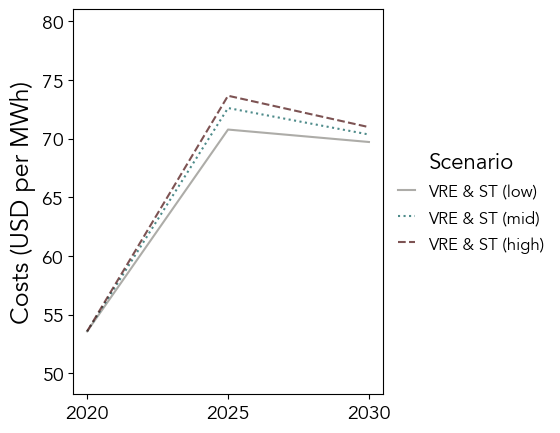

In [24]:
# Enter a title of your choice between the quotation marks ('') under title = ''.
_plot_system_cost(system_cost_, scen_labels_, 
                  unit_label = r'Costs (USD per MWh)', 
                  save       = True, 
                  legend     = True,
                  title      = '', 
                  file_name  = directory + r'/plots/system_cost.png')